Utiliser uniquement les fonctions dans les listes, sinon on recalcule tout à chaque fois !!!!
Tester si mes nouvelles fonctions coincident avec les anciennes en fast callable loin de 0

Regarder dans test pour des idées pour calculer formellement les bornes. Sinon faire approché comme dans exemple polynome.

Faire une version de l'intégrale avec quadrature de gauss, et faire une fonction globale qui cherche les bornes et l'utiliser pour donner la précision des intégrales

Changer les fonction qui approximent pour leur passer directement la liste des points sur lequel on test et on prend la base, comme ça on contrôle n et tout.

Utiliser taylor avec des arguments plus clairs

Il faut convertir a et b et leurs dérivées en RBF/RIF quand je les initialise ? Ou peut importe car on convertit tout après ?

1- Calculer le nouveau noyau  
2- Faire un calculateur d'intégrale rigoureux avec une borne précise (et donc encore réparer les dérivées d'ordre haut)  
3- Borner les noyaux loins de 0 pour se ramener à un rectangle  

Bonus : inégalité de Poincaré pour la norme H^3 car on est sur un compact

In [1]:
## Adding the .simplify_full() command may give cleaner functions to look at, but drastically increases the runtime (from 0.5 sec to more than 4 min), and, most importantly, causes completely unstable computations that ruin the precision (for unknown reasons).
import time
import numpy as np
prec = 300
RBF = RealBallField(prec)
RIF = RealIntervalField(prec)
var('x')
assume(x, 'real')
var('y')
assume(y, 'real')

n_derivs=10  # Number of derivatives to compute


W = (-x/2 + sqrt(1/27 + x^2/4))^(1/3) - (x/2 + sqrt(1/27 + x^2/4))^(1/3)
W_prime = diff(W, x)
a = 1 + W/x + W_prime
b = (3*x)/2 + W
a_derivs = [a]
a_derivs_0=[RBF(a_derivs[0].taylor(x,0))]
b_derivs = [b]
b_derivs_0=[RBF(b_derivs[0].taylor(x,0))]
for k in range(1, n_derivs):
    a_derivs.append(diff(a, x, k))
    a_derivs_0.append(RBF(a_derivs[k].taylor(x,0)))
    b_derivs.append(diff(b, x, k))
    b_derivs_0.append(RBF(b_derivs[k].taylor(x,0)))


phi_0 = -a_derivs[0] + b_derivs[1]/2 + a_derivs[2]/2 - a_derivs[4]/2 + a_derivs[6]/2
phi_1 = -a_derivs[0] - b_derivs[1]/2 + 2*a_derivs[2] + b_derivs[3]/2 - 3*a_derivs[4] - b_derivs[5]/2
phi_2 = -a_derivs[0] - (3/2)*b_derivs[1] + (9/2)*a_derivs[2] + (5/2)*b_derivs[3] 
phi_3 = -a_derivs[0] - (5/2)*b_derivs[1] # corresponds to the sign in the inequality
phi_list = [phi_0, phi_1, phi_2, phi_3]

phi_0_0 = -a_derivs_0[0] + b_derivs_0[1]/2 + a_derivs_0[2]/2 - a_derivs_0[4]/2 + a_derivs_0[6]/2
phi_1_0 = -a_derivs_0[0] - b_derivs_0[1]/2 + 2*a_derivs_0[2] + b_derivs_0[3]/2 - 3*a_derivs_0[4] - b_derivs_0[5]/2
phi_2_0 = -a_derivs_0[0] - (3/2)*b_derivs_0[1] + (9/2)*a_derivs_0[2] + (5/2)*b_derivs_0[3]
phi_3_0 = -a_derivs_0[0] - (5/2)*b_derivs_0[1]  
phi_list_0 = [phi_0_0, phi_1_0, phi_2_0, phi_3_0]


# Base Fourier function
f = (pi/4) * exp(-2*pi*abs(x)) * (2*(pi**2)*(x**2) + 3*pi*abs(x) + 3/2)
lambda_0 = f
lambda_1 = -diff(f, x)
lambda_2 = -diff(f, x, 2)
lambda_3 = 2*diff(f, x, 3)
lambda_4 = diff(f, x, 4)
lambda_list = [lambda_0,lambda_1,lambda_2,lambda_3,lambda_4]
lambda_list_0 = [limit(lambda_0,x=0),limit(lambda_1,x=0),limit(lambda_2,x=0),limit(lambda_3,x=0),limit(lambda_4,x=0)]


M_0 = (lambda_list[0](x=x - y) * phi_list[0](x=y))
M_1 = (lambda_list[1](x=x - y) * diff(phi_list[1], x)(x=y) + lambda_list[2](x=x - y) * phi_list[1](x=y))
M_2 = (lambda_list[3](x=x - y) * diff(diff(phi_list[2], x),x)(x=y) +lambda_list[3](x=x - y) * diff(phi_list[2], x)(x=y)+ lambda_list[4](x=x - y) * phi_list[2](x=y))
M_list=[M_0,M_1,M_2]


In [77]:
def smooth_fast_callable(f,x,zero_value=RBF(0)):
    f_fast = fast_callable(f, vars=[x], domain=RBF)
    def f_modified(ball):
        return RBF(zero_value) if abs(RBF(ball).center()) <= 2**(-prec) else f_fast(ball) # Set the sensibility to be equal to the field precision
    return f_modified

# Convert symbolic functions to numerical ones evaluable on RealBallField elements
a_funcs = [smooth_fast_callable(a_derivs[k],x,a_derivs_0[k]) for k in range(n_derivs)]
b_funcs = [smooth_fast_callable(b_derivs[k],x,b_derivs_0[k]) for k in range(n_derivs)]
phi_funcs = [smooth_fast_callable(phi_list[k],x,phi_list_0[k]) for k in range(4)]
lambda_funcs = [smooth_fast_callable(lambda_list[k],x,lambda_list_0[k]) for k in range(5)]

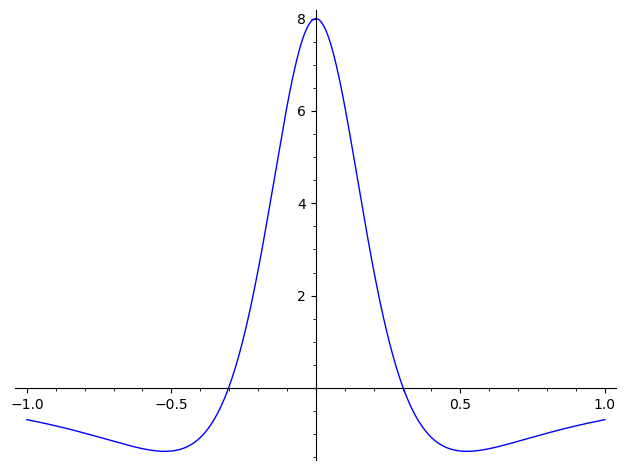

In [68]:
plot(a_derivs[2],-1,1)

In [92]:
phi_1_d1_0=diff(phi_list[1],x).taylor(x,0)
phi_1_d1_func=smooth_fast_callable(diff(phi_list[1],x),x,phi_1_d1_0)

phi_2_d1_0=diff(phi_list[2],x).taylor(x,0)
phi_2_d1_func=smooth_fast_callable(diff(phi_list[2],x),x,phi_2_d1_0)
phi_2_d2_0=diff(diff(phi_list[2],x),x).taylor(x,0)
phi_2_d2_func=smooth_fast_callable(diff(diff(phi_list[2],x),x),x,phi_2_d2_0)


def M_0_func(ball1,ball2):
   return lambda_funcs[0](ball1-ball2)*phi_funcs[0](ball2)
    
def M_1_func(ball1, ball2):
    return (lambda_funcs[1](ball1-ball2) * phi_1_d1_func(ball2) + lambda_funcs[2](ball1-ball2) * phi_funcs[1](ball2))

def M_2_func(ball1, ball2):
    return (lambda_funcs[3](ball1-ball2) * phi_2_d2_func(ball2) + lambda_funcs[3](ball1-ball2) * phi_2_d1_func(ball2) + lambda_funcs[4](ball1-ball2) * phi_funcs[2](ball2))


M_funcs=[M_0_func,M_1_func,M_2_func]

In [93]:
f = 1+ x^2
#f_fast=fast_callable(f,vars=[x],domain=RIF)
f_fast= M_funcs[2]
Ix=RIF([-1,1])
Iy=RIF([-1,1])
print((f_fast(Ix,Iy).upper()))

94101.0530714740468782929528383564489926924672881330595951989264335172600810863125293784267


In [4]:
print(fast_callable(a_derivs[1],vars=[x],domain=RBF)(RBF(1e-30)))
print(smooth_fast_callable(a_derivs[1],x,a_derivs_0[1])(RBF(0)))

# Compare old and new versions

print(fast_callable(M_2,vars=[x,y],domain=RBF)(RBF(pi),RBF(0)))
print(M_2_func(RBF(pi),RBF(1e-15)))


[+/- 1.22e-29]
0
nan
[1.010066215702173 +/- 1.72e-16]


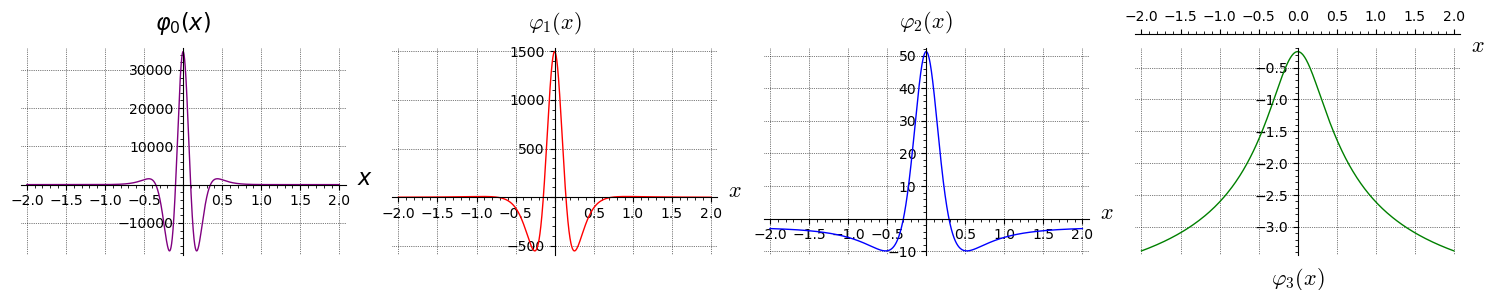

In [5]:
plots = []
colors = ['purple', 'red', 'blue', 'green', 'orange']

for k in range(4):
    axes_label = [r'$x$', f'$\\varphi_{{{k}}}(x)$']
    p = plot(phi_funcs[k], (x, -2, 2), color=colors[k],figsize=3,
             axes_labels=axes_label, gridlines=True)
    plots.append(p)

show(graphics_array([plots]), figsize=[15, 3])

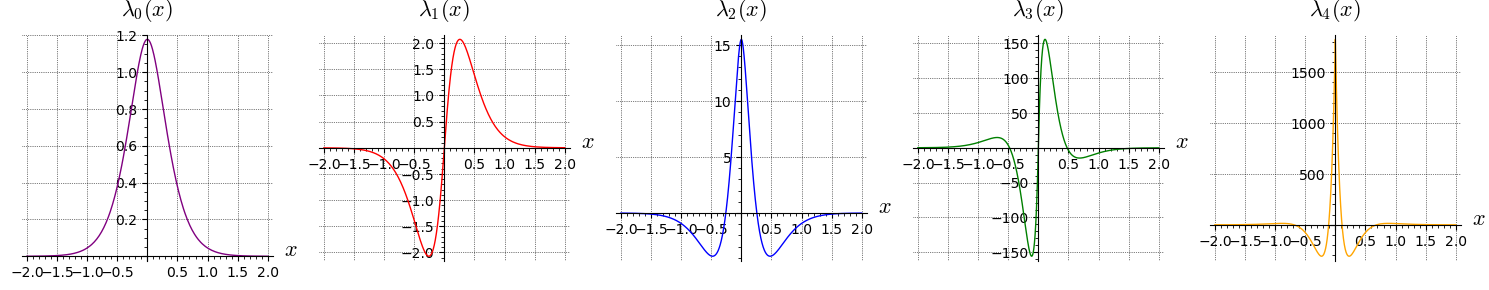

In [6]:
plots = []
colors = ['purple', 'red', 'blue', 'green', 'orange']

for k in range(5):
    axes_label = [r'$x$', f'$\\lambda_{{{k}}}(x)$']
    p = plot(lambda_funcs[k], (x, -2, 2), color=colors[k],figsize=3,
             axes_labels=axes_label, gridlines=True)
    plots.append(p)

show(graphics_array([plots]), figsize=[15, 3])

In [ ]:
def rigorous_max_partial_derivatives(fx,fy, x1, x2, y1, y2):
    I_x = RBF(x1, x2)
    I_y = RBF(y1, y2)

    fx_eval = RBF(fx(x=I_x, y=I_y))
    fy_eval = RBF(fy(x=I_x, y=I_y))

    fx_sup = RBF(max(abs(fx_eval.lower()), abs(fx_eval.upper())))
    fy_sup = RBF(max(abs(fy_eval.lower()), abs(fy_eval.upper())))

    return fx_sup, fy_sup

def riemann_integral(f,fx,fy, x1, x2, y1, y2, n):

    dx = (RBF(x2) - RBF(x1))/n
    dy = (RBF(y2) - RBF(y1))/n

    total = RBF(0)
    for i in range(n):
        for j in range(n):
            xi = RBF(x1) + i*dx
            yj = RBF(y1) + j*dy
            total += f(xi, yj) * dx * dy
            if f(xi,yj).is_NaN():
                print(yj.center())
            sys.stdout.write(f"\rProgression : {int(((n*i+j) / (n**2)) * 100)}%") # Progress bar
            sys.stdout.flush()

    #max_fx, max_fy = rigorous_max_partial_derivatives(f_expr, x1, x2, y1, y2)

    # Calcul borne d'erreur théorique
    # largeur = R(x2) - R(x1)
    # hauteur = R(y2) - R(y1)
    # error_bound = (largeur * hauteur / n) * (largeur * max_fx + hauteur * max_fy)
    return total #,error_bound

approx_integral  = riemann_integral(M_funcs[2],0,0,-1,1,-1,1, n=50)

print(f"\rApproximation de l'intégrale : {approx_integral}")
# print(f"Borne d'erreur théorique (approx.) : {error_bound}")
# print("L'intégrale est contenue dans l'intervalle [",float((approx_integral-error_bound).lower()) ,",",float((approx_integral+error_bound).upper()),"]")

Approximation de l'intégrale : [-311.484705033183418648620049987071771590367182688421123817744088510933450860937849 +/- 2.94e-79]


In [10]:
def K(q, center, sig):
    return exp(-(q-center)**2/(2 * sig**2)) + exp(-(q+center)**2/(2 * sig**2))

def G(q, center, sig):
    return exp(-(q-center)**2/(2 * sig**2))

def fit_num(func, basis_left=-10, basis_right=10, basis_num=201, basis_type='G', sigma=1/2, train_left=-10, train_right=10, train_num=401):
    
    train_pts = vector([train_left + j*(train_right-train_left)/(train_num-1) for j in range(train_num)])
    basis_pts = vector([basis_left + j*(basis_right-basis_left)/(basis_num-1) for j in range(basis_num)])
    true_vals = vector(RR, [func(x) for x in train_pts])    

    var('p, q, r')
    if basis_type == 'G':
        fG = fast_callable(G(p, q, r), vars=[p, q, r], domain=RR)
        M_norm = matrix(RR, train_num, basis_num, lambda i, j: fG(train_pts[i], basis_pts[j], sigma))
    elif basis_type == 'K':
        fG = fast_callable(K(p, q, r), vars=[p, q, r], domain=RR)
        M_norm = matrix(RR, train_num, basis_num, lambda i, j: fG(train_pts[i], basis_pts[j], sigma))
    
    # use numpy least squares to fit
    result, residual, rk, sth = np.linalg.lstsq(M_norm, true_vals, rcond=None)
    mse = np.mean((np.dot(M_norm, result) - true_vals)**2)
    print(f"Mean squared error: {mse}")
    
    # calculate the approximate function
    if basis_type == 'G':
        approx_fun = sum([result[j] * G(x, basis_pts[j], sigma) for j in range(basis_num)])
    elif basis_type == 'K':
        approx_fun = sum([result[j] * K(x, basis_pts[j], sigma) for j in range(basis_num)])        
    
    return result, approx_fun, mse

Mean squared error: 3.3133806144961566


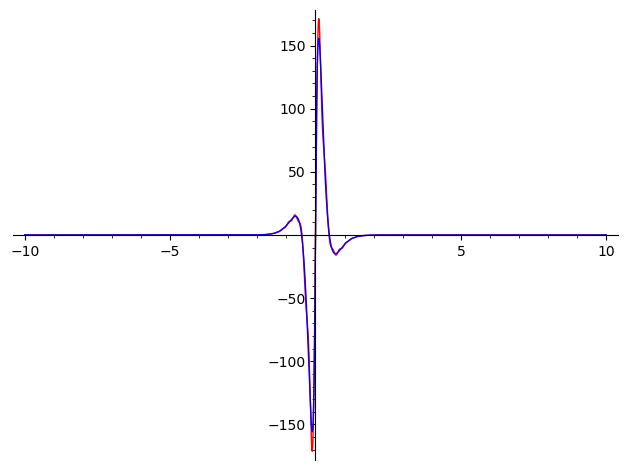

In [64]:
#f=fast_callable(cos(2*x) * exp((-1/10)* x**2) + (1/10) * cos(3*x),vars=[x],domain=RBF)
f=lambda_funcs[3]

res, app, err = fit_num(f, basis_left=-10, basis_right=10, basis_num=100, basis_type='G', sigma=1/12, train_left=-10, train_right=10, train_num=200)

line1 = plot(app, (x, -10, 10),color='red')
line2 = plot(f, (x, -10, 10),color='blue')
line1+line2

In [48]:
def riemann_sum(f, y1, y2, n):
    delta = (y2 - y1) / n
    y_points = [y1 + (i + 0.5) * delta for i in range(n)]  # points au milieu des sous-intervalles
    def g(x):
        return sum(delta * f(x, y_i) for y_i in y_points)
    return g

Mean squared error: 0.00031885888385577306


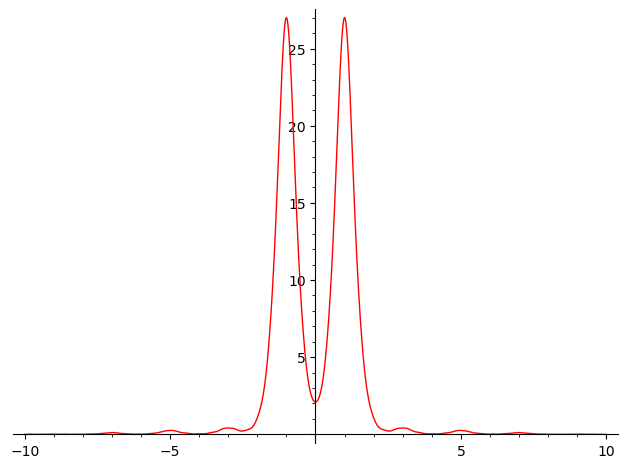

In [ ]:
A=10
n=10

approx_M = riemann_sum(M_0_func,-A,A,n)

res, app, err = fit_num(approx_M, basis_left=-A, basis_right=A, basis_num=100, basis_type='G', sigma=1/2, train_left=-A, train_right=A, train_num=200)